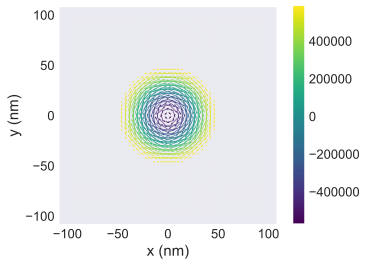

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='svg'
thickness = 4e-9
cell = (4e-9, 4e-9, 4e-9)
p1 = (-100e-9, -100e-9, -thickness/2)
p2 = (100e-9, 100e-9, thickness/2)
region=df.Region(p1=p1,p2=p2)
mesh = df.Mesh(region=region, cell=cell)
system = mm.System(name='custom_skyrmion')
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.3)
system.energy = mm.Exchange(A=1e-11)+mm.DMI(D=3.2e-3, crystalclass='Cnv_z')+mm.UniaxialAnisotropy(K=0.8e6, u=(0,0,1))
def Bloch_skyrmion(pos):
    R = 50e-9 #Skyrmion radius
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2) #The skyrmion center is located at (0, 0)
    phi = np.arctan2(y, x)+np.pi/2
    
    k = np.pi / R
    
    if r < R :
        m = (-np.sin(k * r) * np.cos(phi), -np.sin(k * r) * np.sin(phi), -np.cos(k * r))
    else:
        m = (0, 0, 1)
    return m

system.m =  df.Field(mesh, dim=3, value=Bloch_skyrmion, norm=5.8e5)
system.m.plane('z').mpl.vector()

### Change the default font

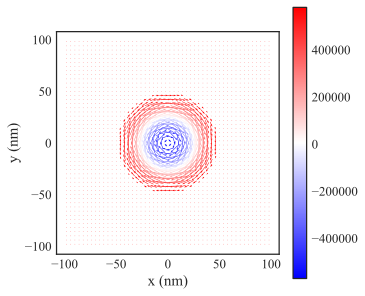

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rcParams
style.use('seaborn-white')
plt.rc('font',family='Times New Roman')
config = {
    "font.family":'Times New Roman',
    "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
fig=plt.figure(figsize=(5,5),dpi=100)
ax=fig.add_subplot(111)
system.m.plane('z').mpl.vector(ax=ax,color_field=system.m.z,cmap='bwr')

### Add more details (scale inward, border thickness, zoom arrow scale, define arrow size, etc...)

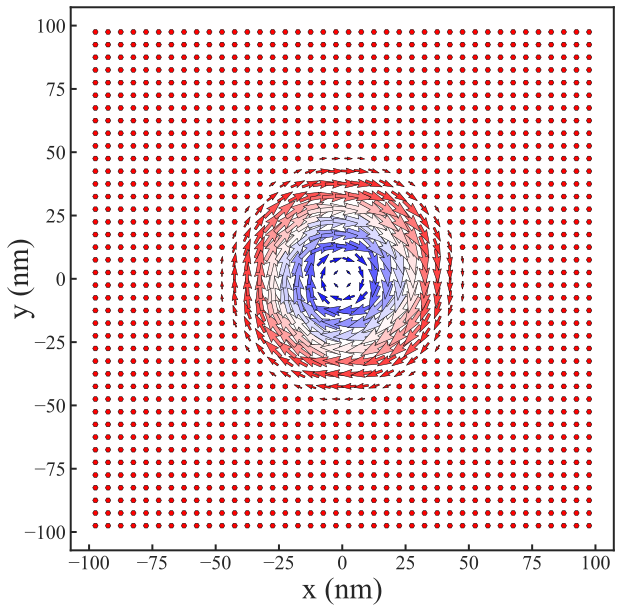

In [15]:
fig=plt.figure(figsize=(10,10),dpi=100)
ax=fig.add_subplot(111)
ax.spines['bottom'].set_linewidth(2);###Set the thickness of the bottom axis
ax.spines['left'].set_linewidth(2);####Set the thickness of the left axis
ax.spines['right'].set_linewidth(2);###Set the thickness of the right axis
ax.spines['top'].set_linewidth(2);####Set the thickness of the top axis
ax.tick_params(length=6,width=2,direction='in',labelsize=20)
ax.set_xlabel('x '+r'$(nm)$',fontsize=30)
ax.set_ylabel('y '+r'$(nm)$',fontsize=30,labelpad=-10)
system.m.plane(z=0,n=(40,40)).mpl.vector(ax=ax,color_field=system.m.z,cmap='bwr',width=0.01,clim=(-5.8e5,5.8e5),scale=1e7,headlength=5,minshaft=1.5,edgecolor='k',linewidth=0.5,headwidth=3,colorbar=False)
